In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.train(
    data='/content/drive/MyDrive/cowproject2/cow_identify/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='cow_face_experiment'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/cowproject2/cow_identify/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640,

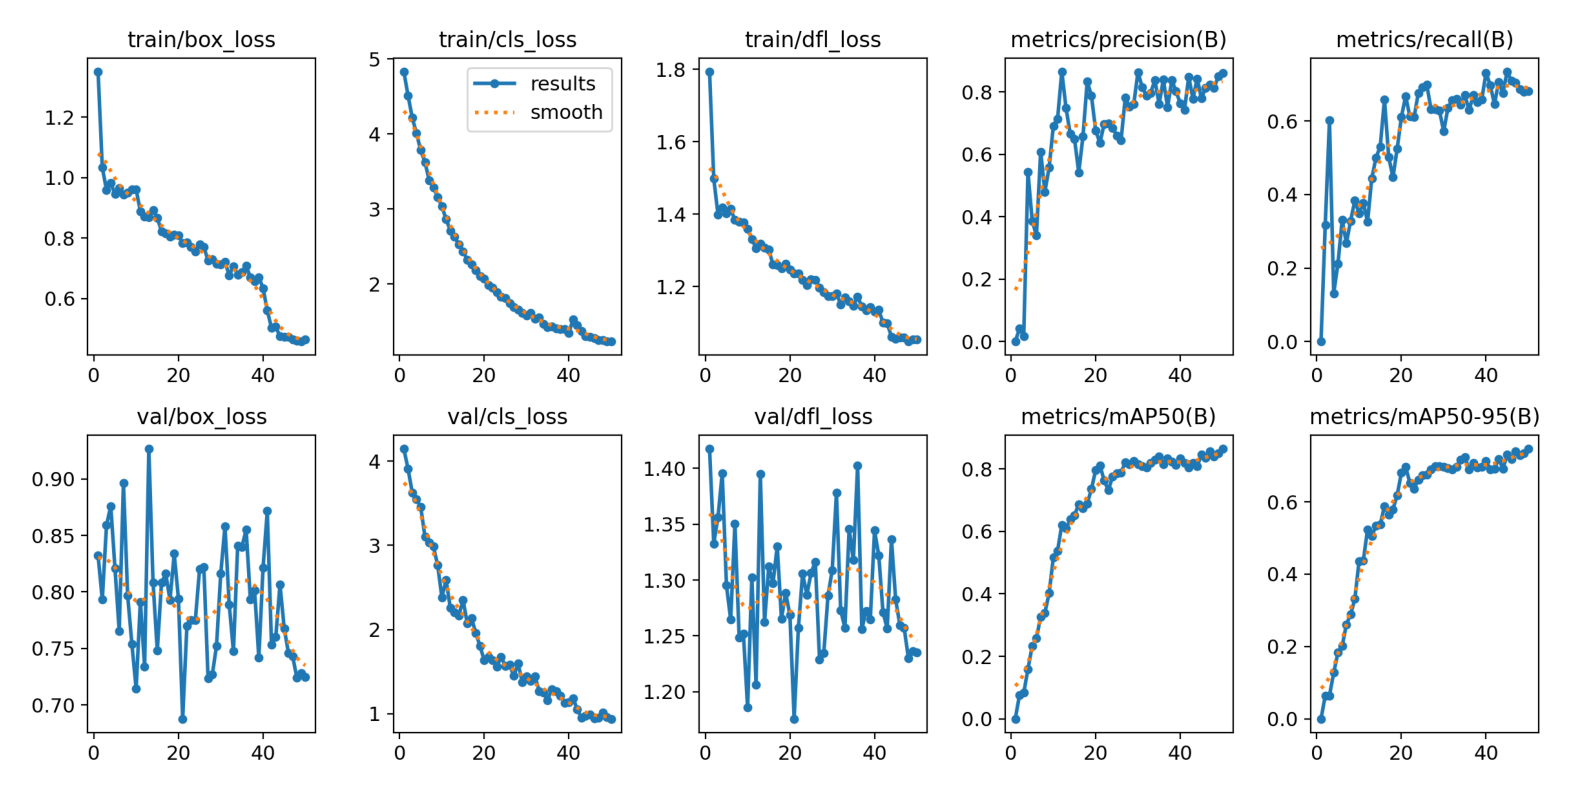

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('runs/detect/cow_face_experiment/results.png')
plt.figure(figsize=(20, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

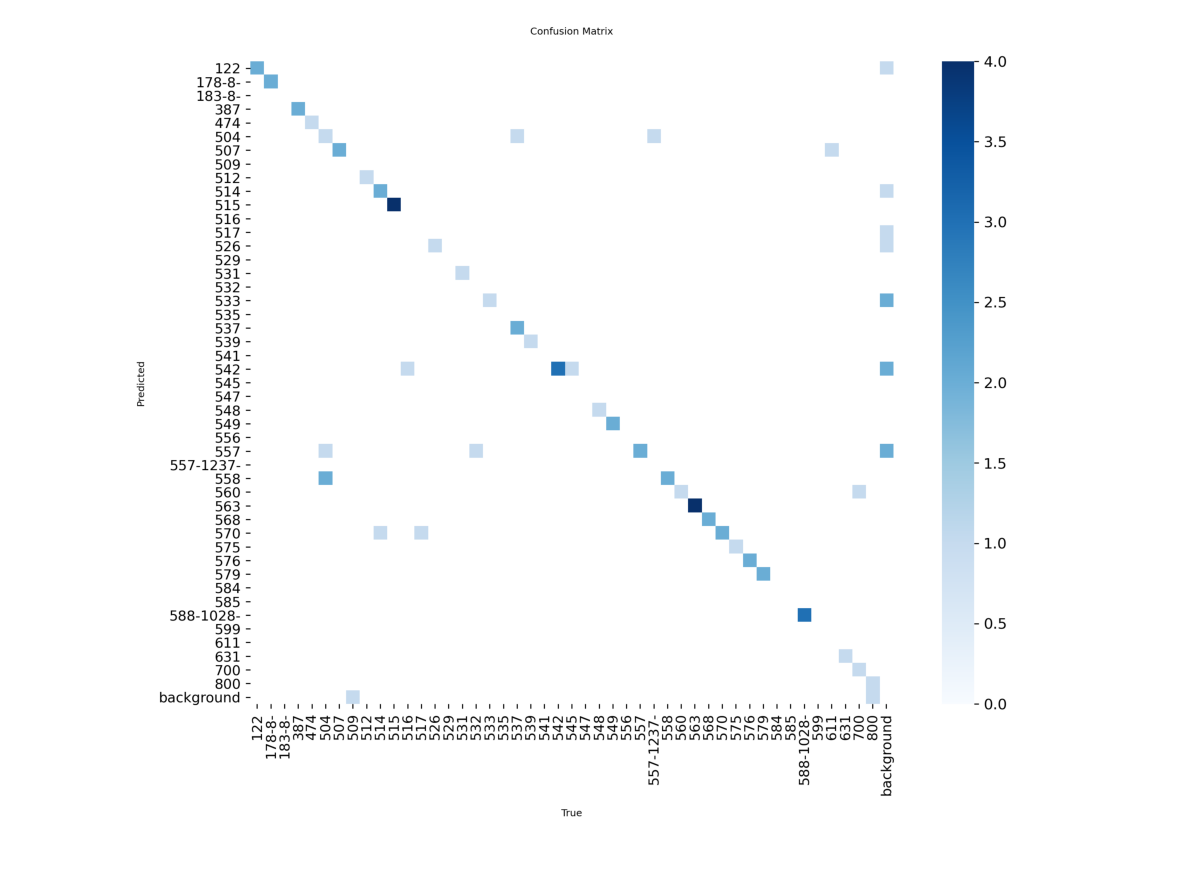

In [ ]:
img = mpimg.imread('runs/detect/cow_face_experiment/confusion_matrix.png')
plt.figure(figsize=(15, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

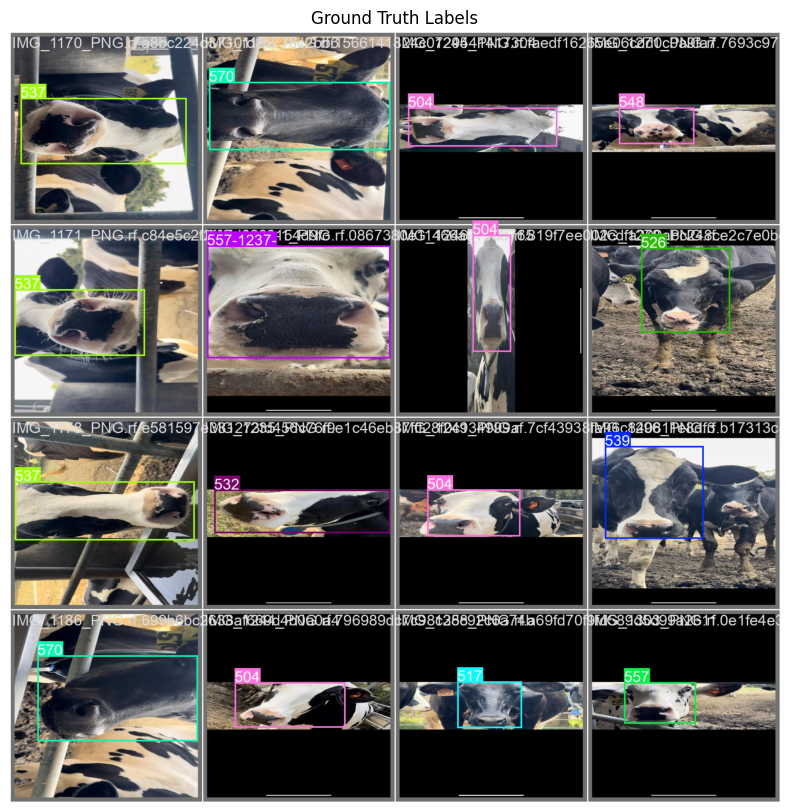

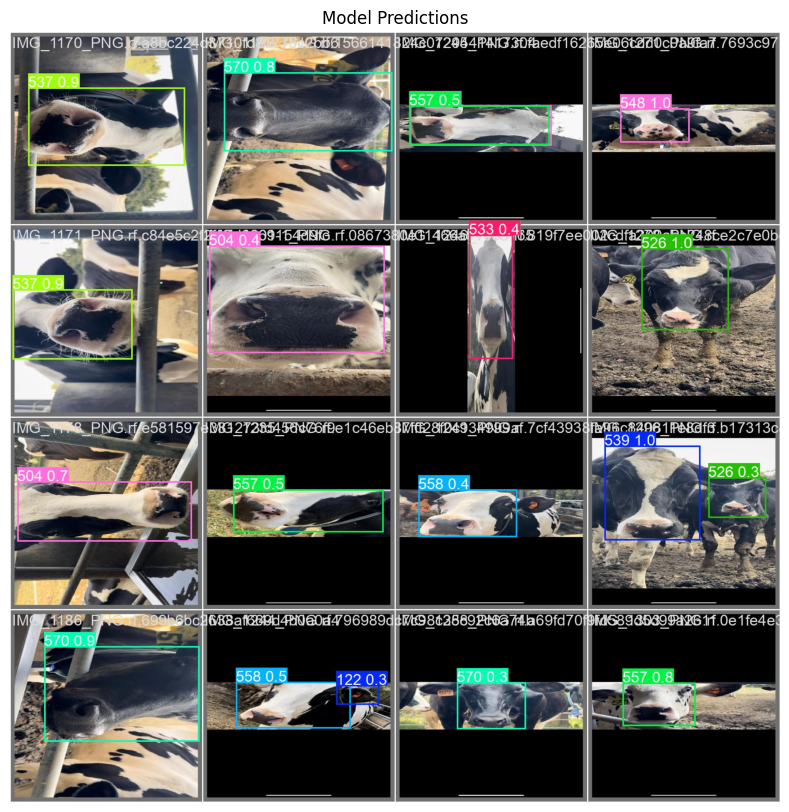

In [ ]:
# View ground truth labels
img = mpimg.imread('runs/detect/cow_face_experiment/val_batch0_labels.jpg')
plt.figure(figsize=(15, 10))
plt.title("Ground Truth Labels")
plt.imshow(img)
plt.axis('off')
plt.show()

# View model predictions
img = mpimg.imread('runs/detect/cow_face_experiment/val_batch0_pred.jpg')
plt.figure(figsize=(15, 10))
plt.title("Model Predictions")
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Run validation on the 'test' or 'val' set
metrics = model.val()

# Print specific metrics
print(f"Mean Average Precision @ 50: {metrics.box.map50:.3f}")
print(f"Mean Average Precision @ 50-95: {metrics.box.map:.3f}")

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,014,618 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.8±1.0 ms, read: 18.7±9.9 MB/s, size: 55.8 KB)
val: Scanning /content/drive/MyDrive/cowproject2/cow_identify/valid/labels.cache... 67 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 67/67 84.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.4it/s 3.6s
                   all         67         67      0.859      0.681      0.864      0.749
                   122          2          2      0.895          1      0.995      0.895
                178-8-          2          2      0.919          1      0.995      0.896
                   387          2          2      0.958          1      0.995      0.946
                   474          1          1      0.865          1      0.995      0.796
                   504     

Saving IMG_1320_PNG.rf.7b30cff2b0c62bd94b143c94ad086609.jpg to IMG_1320_PNG.rf.7b30cff2b0c62bd94b143c94ad086609 (1).jpg

image 1/1 /content/IMG_1320_PNG.rf.7b30cff2b0c62bd94b143c94ad086609 (1).jpg: 640x640 1 122, 9.4ms
Speed: 2.3ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

--- Analysis for: IMG_1320_PNG.rf.7b30cff2b0c62bd94b143c94ad086609 (1).jpg ---
Detected Cow IDs: 122


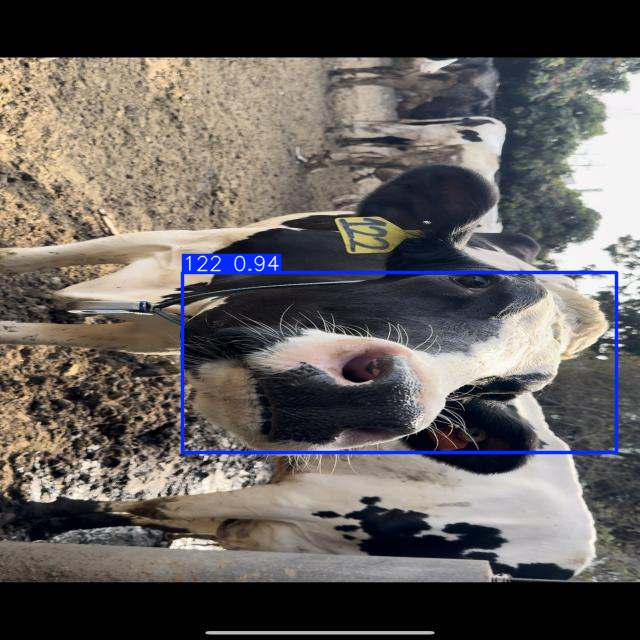

In [ ]:
from google.colab import files
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

model_path = '/content/drive/MyDrive/cowproject2/cow_identify/best.pt'
model = YOLO(model_path)

uploaded = files.upload()

for filename in uploaded.keys():
  
    results = model.predict(source=filename, conf=0.25)

    
    names = model.names  
    detected_classes = []

    for r in results:
        for c in r.boxes.cls:
            class_name = names[int(c)]
            detected_classes.append(class_name)

    res_plotted = results[0].plot()

    print(f"\n--- Analysis for: {filename} ---")
    if len(detected_classes) > 0:
        print(f"Detected Cow IDs: {', '.join(detected_classes)}")
    else:
        print("No cow faces detected.")

    cv2_imshow(res_plotted)